# Exploratory Data Analysis

This exploratory data analysis notebook for the plumbing data project aims to gain a deeper understanding of the $15 Plumbing & Drain Services by using the visualization tool from Matplotlib and Seaborn.

# Import Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Data Acquisition

In [2]:
def read_data(file_path):
    try:
        data = pd.read_csv(file_path, parse_dates=['Completion Date', 'Invoice Date','Last Job Completed'],
                           dtype={'Customer ID':'object'})
        return data
    except:
        data = pd.read_csv(file_path, dtype={'Customer ID':'object'})
        return data

In [3]:
full_data = r"C:\Users\nene0\OneDrive\바탕 화면\Python Learning\plumbing_project\Cleaned_Data.csv"
res_file = r"C:\Users\nene0\OneDrive\바탕 화면\Python Learning\plumbing_project\Residential_Plumbing.csv"
com_file = r"C:\Users\nene0\OneDrive\바탕 화면\Python Learning\plumbing_project\Commercial_Plumbing.csv"
population_file = r"C:\Users\nene0\OneDrive\바탕 화면\Python Learning\plumbing_project\city_household.csv"

In [4]:
plumbing = read_data(full_data)
residential = read_data(res_file)
commercial = read_data(com_file)
city = read_data(population_file)

# Data Analysis and Visualization

## Full Data

### Number of Invoices and Revenue

In [9]:
plumb_grouped = plumbing.groupby('Invoice_Yr_Mo').agg({'Total':'sum','Invoice #':'count'}).reset_index()
plumb_grouped['Invoice_Yr_Mo'] = pd.to_datetime(plumb_grouped['Invoice_Yr_Mo'], format='%Y-%b')
plumb_grouped = plumb_grouped.sort_values(by='Invoice_Yr_Mo').reset_index(drop=True)

plumb_grouped['Accumulated Total'] = plumb_grouped['Total'].cumsum()
plumb_grouped['Accumulated Invoice'] = plumb_grouped['Invoice #'].cumsum()
plumb_grouped['Invoice_Yr_Mo'] = plumb_grouped['Invoice_Yr_Mo'].dt.strftime('%Y-%m')

plumb_grouped['Total (10K)'] = round(plumb_grouped['Total'] / 10000, 2)
plumb_grouped['Accumulated Total (10K)'] = round(plumb_grouped['Accumulated Total'] / 10000, 2)


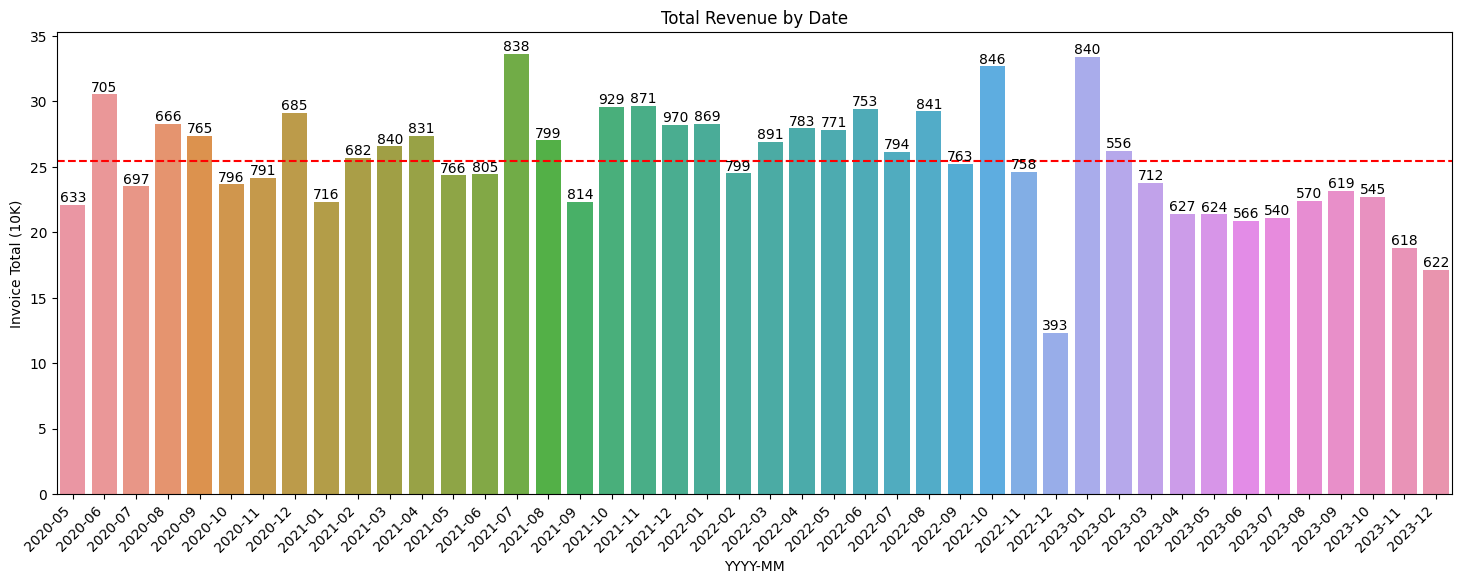

In [10]:
plt.figure(figsize=(18,6))
ax = sns.barplot(data=plumb_grouped, x='Invoice_Yr_Mo', y='Total (10K)')
plt.title('Total Revenue by Date')
plt.axhline(plumb_grouped['Total (10K)'].median(), color='red', linestyle='--')
plt.xlabel('YYYY-MM')
plt.ylabel('Invoice Total (10K)')
plt.xticks(rotation=45, ha='right')

for bar, inv_count in zip(ax.patches, plumb_grouped['Invoice #']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{inv_count}', ha='center', va='bottom')

plt.show()

In [11]:
plumb_grouped['Invoice #'].median()

764.0

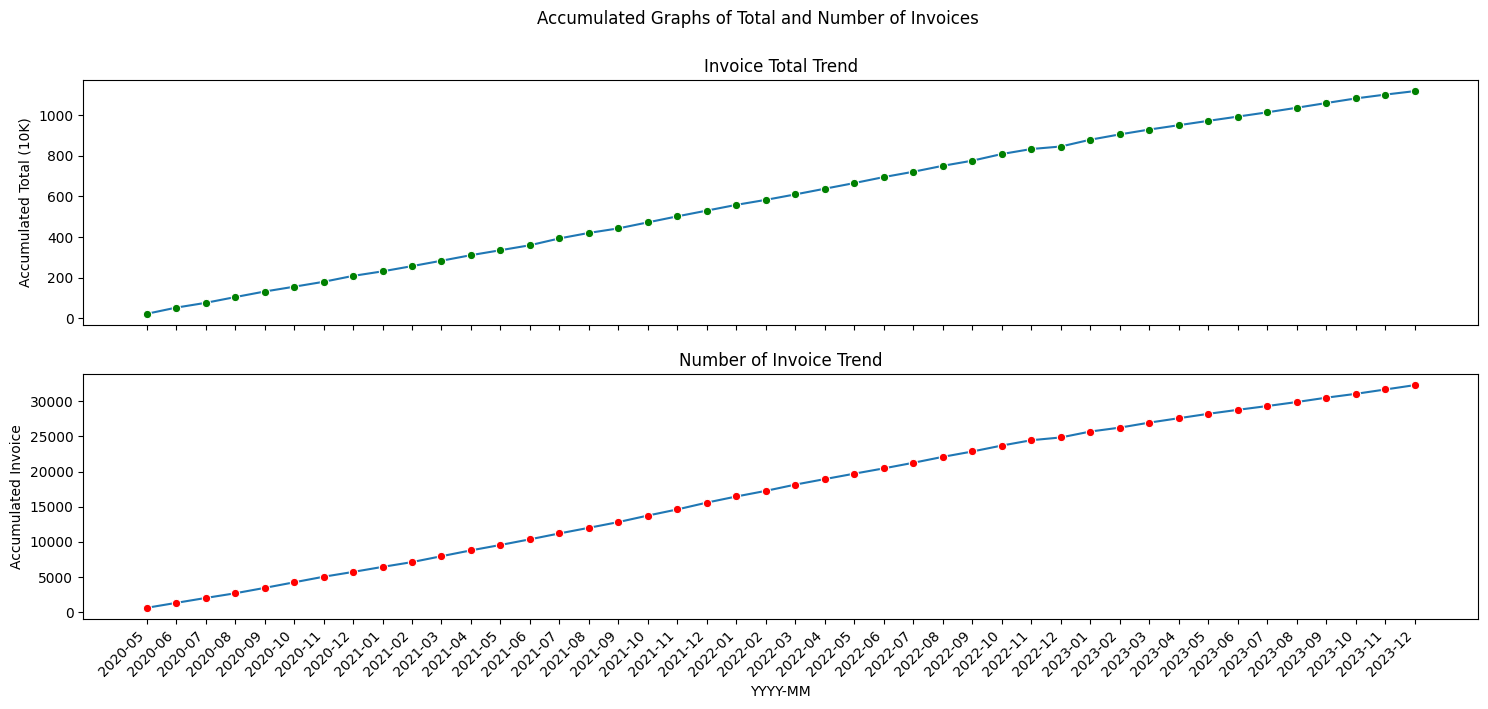

In [12]:
fig, axes = plt.subplots(2,1, figsize=(18,7), sharex=True)

sns.lineplot(data=plumb_grouped, x='Invoice_Yr_Mo', y='Accumulated Total (10K)', marker='o', markerfacecolor='green', ax=axes[0])
axes[0].set_title('Invoice Total Trend')

sns.lineplot(data=plumb_grouped, x='Invoice_Yr_Mo', y='Accumulated Invoice', marker='o', markerfacecolor='red', ax=axes[1])
axes[1].set_title('Number of Invoice Trend')
axes[1].set_xlabel('YYYY-MM')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.suptitle('Accumulated Graphs of Total and Number of Invoices')
plt.show()

The graph above displays the number of invoices and their total amounts over time. On average, the total invoice amount is around 250,000K.

There's a noticeable anomaly in December 2022, where the number of invoices was 393, but in the following month, January 2023, it spiked to 840. This sudden increase was caused by an employee who was proficient in using the data analysis tool leaving the company. During their absence, manual data recording resulted in the spike in January 2023.

The second graph illustrates a consistent growth trend in both the accumulated invoice total and the number of invoices over time.

### Invoice Total and Revenue (Sum, Mean, Median) by Customer Type

In [13]:
type_sum = plumbing.groupby('Type')[['Total','Customers Lifetime Revenue']].sum().reset_index()
type_med = plumbing.groupby('Type')[['Total','Customers Lifetime Revenue']].median().reset_index()
type_avg = plumbing.groupby('Type')[['Total','Customers Lifetime Revenue']].mean().reset_index()

In [14]:
def type_barplot(data, agg_str):
    fig, axes = plt.subplots(1,2, figsize=(8,4))

    sns.barplot(data=data, x='Type', y='Total', ax=axes[0])
    axes[0].set_title('Invoice Total')

    sns.barplot(data=data, x='Type', y='Customers Lifetime Revenue', ax=axes[1])
    axes[1].set_title('Lifetime Revenue')

    plt.suptitle(f"{agg_str} of the Invoice Total and Lifetime Revenue by Customer Type")

    plt.tight_layout()
    plt.show()

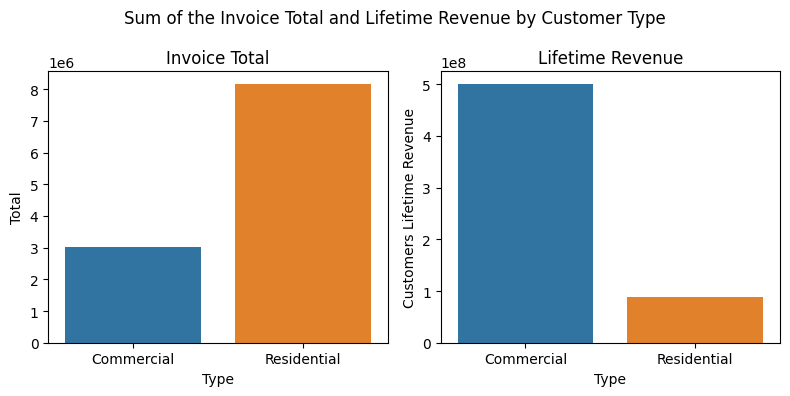

In [15]:
type_barplot(type_sum, 'Sum')

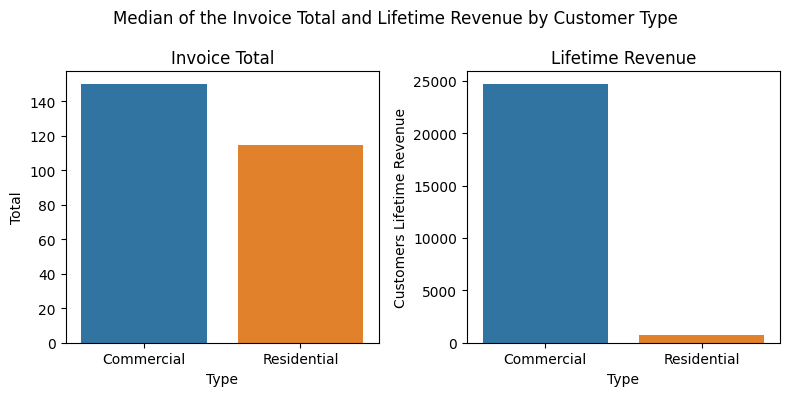

In [16]:
type_barplot(type_med, 'Median')

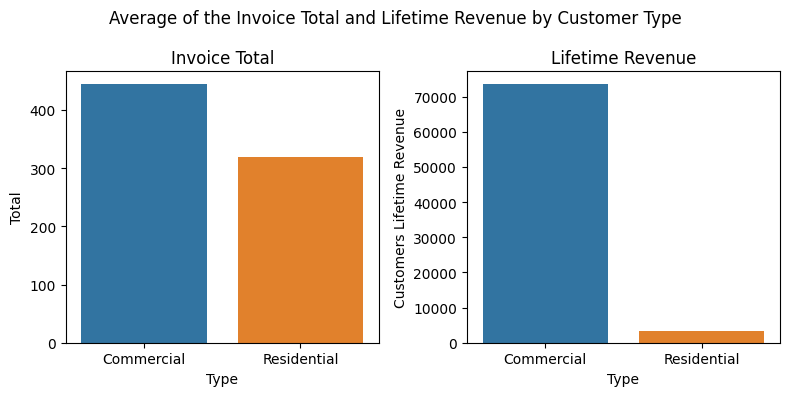

In [17]:
type_barplot(type_avg, 'Average')

The graphs reveal some intriguing insights. In the first graph, which depicts the total invoice amounts, it's apparent that the business serves more residential customers than commercial ones, as the total sum for residential invoices is higher. However, when considering the median and mean values of the invoice totals, it's evident that commercial customers tend to pay more for each service.

Based on these observations, we might suggest that the business focuses on attracting more commercial customers.

### Number of Customers by City

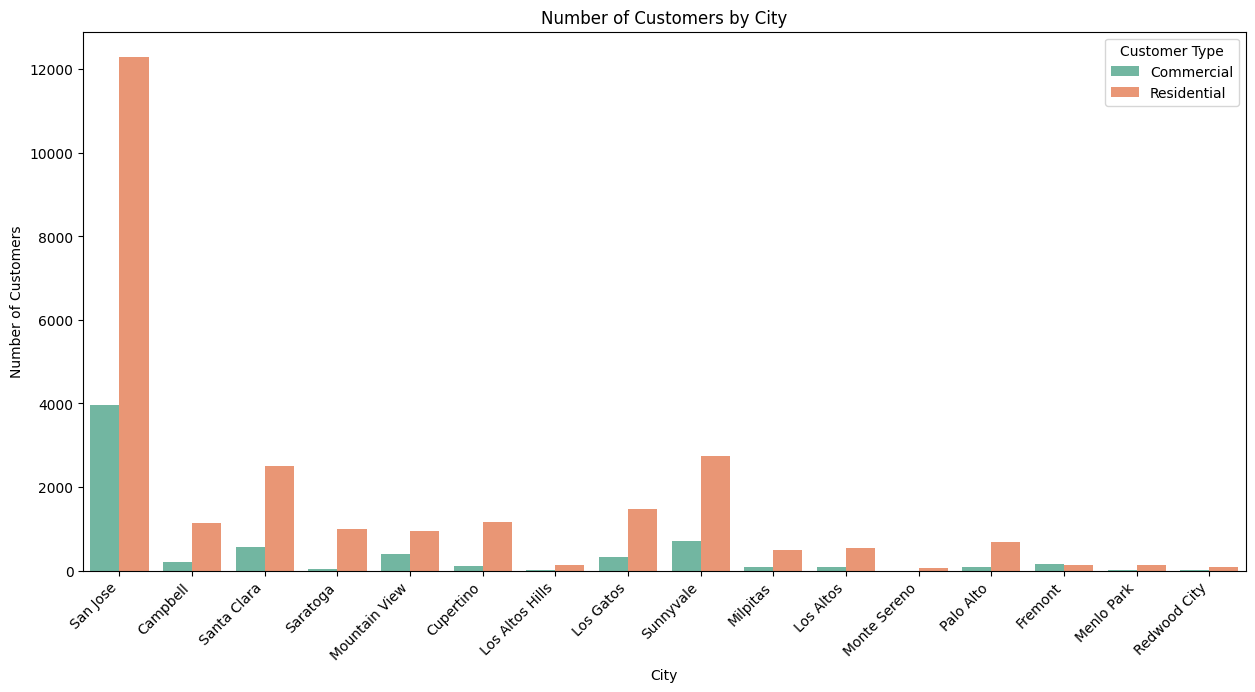

In [135]:
plt.figure(figsize=(15,7))
sns.countplot(data=plumbing, x='Location City', hue='Type', palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Customers')
plt.xlabel('City')
plt.title('Number of Customers by City')
plt.legend(title='Customer Type')

plt.show()

In the bar plot above, it's clear that San Jose has the highest number of customers, followed by Santa Clara and Sunnyvale. On the other hand, Monte Sereno, Los Altos Hills, Menlo Park, and Redwood City have very few commercial customers. Interestingly, Fremont has more commercial customers than residential ones. This chart helps identify cities with a predominantly residential or commercial customer base.

### Months Since Last Service

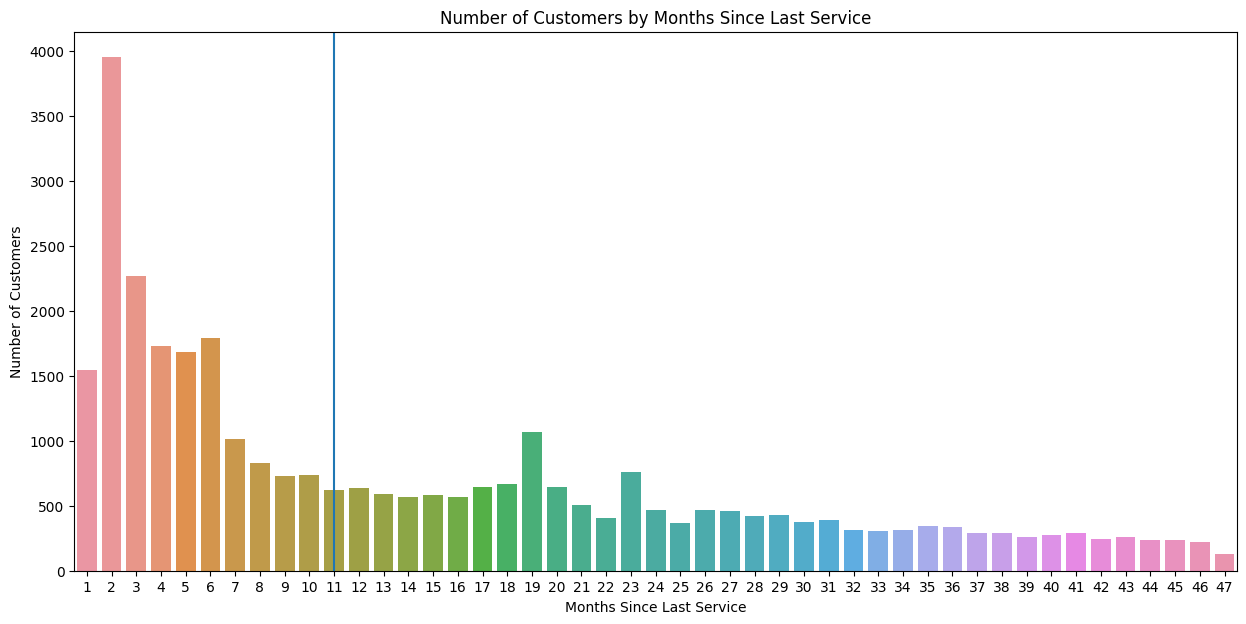

In [152]:
plt.figure(figsize=(15,7))
sns.countplot(data=plumbing, x='Last Service_Months')
plt.ylabel('Number of Customers')
plt.xlabel('Months Since Last Service')
plt.axvline(plumbing['Last Service_Months'].median())
plt.title('Number of Customers by Months Since Last Service')

plt.show()

The chart above illustrates the frequency at which customers return for services after their last visit. It's evident that most customers return within 2 to 6 months. However, there are instances where customers return after longer intervals, such as 19 or 23 months, indicating a gap of over a year but less than two years. The median time since the last service is 11 months, implying that half of the customers return within this timeframe, which is less than a year. Exploring why some customers return after such extended periods, particularly over 1.5 years, could provide valuable insights for the business to better retain customers.

### Top 10 Customers by Invoice Total & Lifetime Revenue

In [18]:
customer_grouped = plumbing.groupby('Customer ID').agg({'Total':'sum','Customers Lifetime Revenue':'sum','Invoice #':'count'}).reset_index()
top_total = customer_grouped.sort_values(by='Total', ascending=False)[:10]
top_rev = customer_grouped.sort_values(by='Customers Lifetime Revenue', ascending=False)[:10]
top_inv = customer_grouped.sort_values(by='Invoice #', ascending=False)[:20]

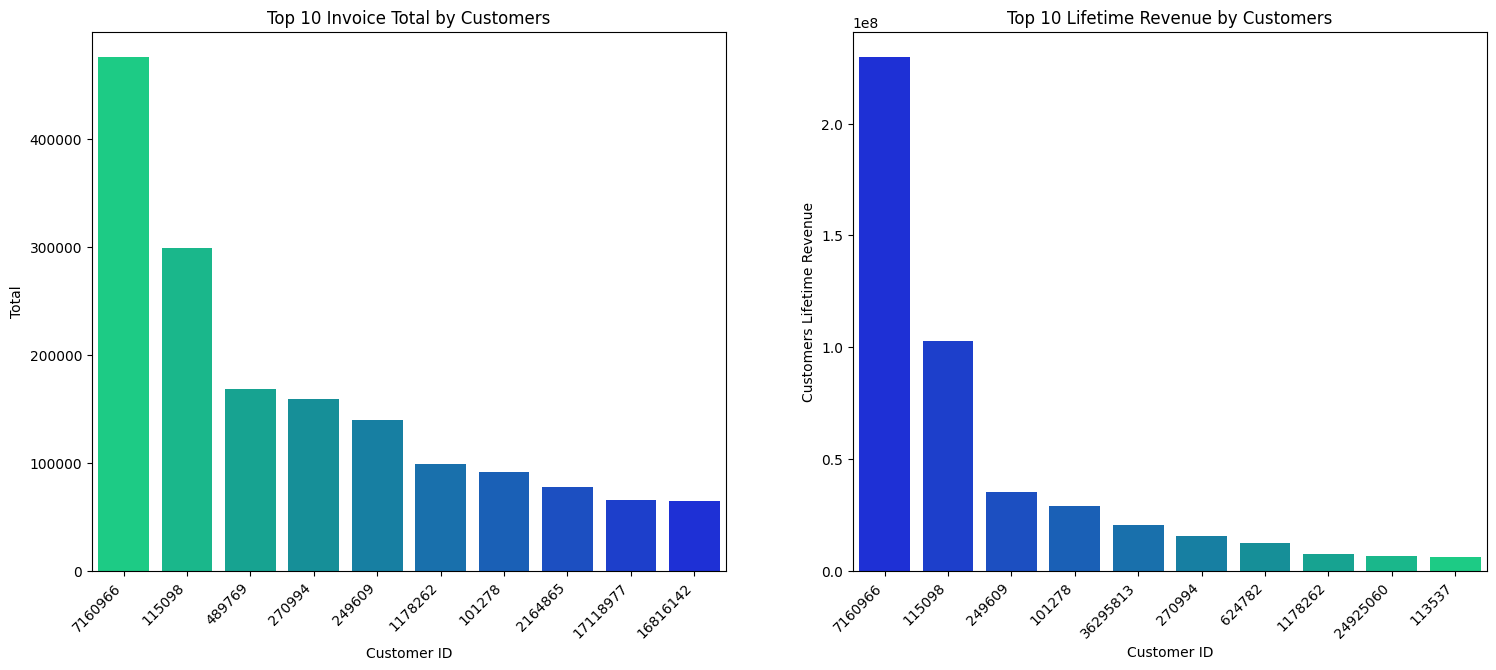

In [19]:
fig, axes = plt.subplots(1,2, figsize=(18,7))

sns.barplot(data=top_total, x='Customer ID', y='Total', palette='winter_r', ax=axes[0])
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_xticklabels(axes[0].get_xticklabels(), ha='right')
axes[0].set_title('Top 10 Invoice Total by Customers')

sns.barplot(data=top_rev, x='Customer ID', y='Customers Lifetime Revenue', palette='winter', ax=axes[1])
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_xticklabels(axes[1].get_xticklabels(), ha='right')
axes[1].set_title('Top 10 Lifetime Revenue by Customers')

plt.show()

The graph above highlights the top 10 customers serviced by the business. Customer ID '7160966' stands out as the most profitable client.

### Top 20 Companies by Number of Invoices

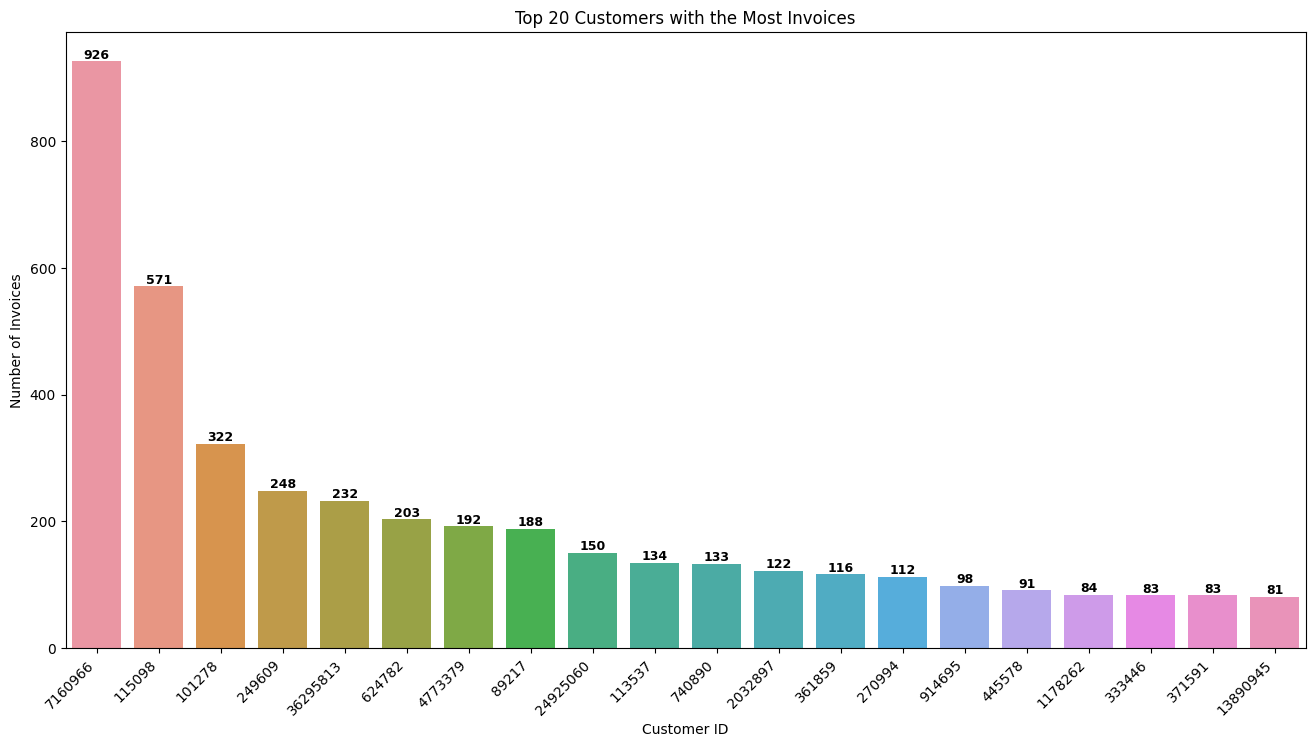

In [20]:
plt.figure(figsize=(16,8))
ax = sns.barplot(data=top_inv, x='Customer ID', y='Invoice #')
ax.bar_label(ax.containers[0], label_type='edge', fontweight='bold', fontsize=9)
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Customers with the Most Invoices')
plt.ylabel('Number of Invoices')
plt.show()

The graph above presents the top 20 customers with the highest number of invoices. For instance, customer ID '7160966' holds the top position with a total of 926 invoices recorded in our dataset.

### Customers with Multiple Locations

In [21]:
location_grouped = plumbing.groupby(['Customer ID','Location Zip'])['Invoice #'].count()
customer_location_count = location_grouped.groupby('Customer ID').size()
multiple_locations = customer_location_count[customer_location_count > 1].index
filtered_location = location_grouped.loc[location_grouped.index.get_level_values('Customer ID').isin(multiple_locations)]
filtered_location = filtered_location.reset_index()
location_count = filtered_location.groupby('Customer ID')['Location Zip'].count().reset_index().sort_values(by='Location Zip', ascending=False)[:20]

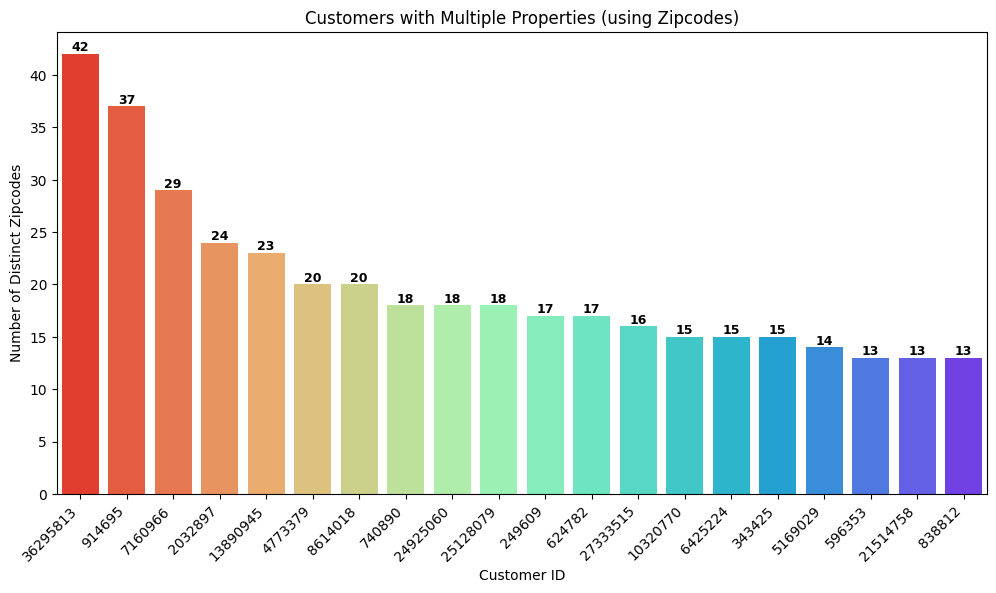

In [154]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=location_count, x='Customer ID', y='Location Zip', palette='rainbow_r')
ax.bar_label(ax.containers[0], label_type='edge', fontweight='bold', fontsize=9)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Distinct Zipcodes')
plt.title('Customers with Multiple Properties (using Zipcodes)')

plt.show()

The graph above displays customers with multiple properties, identified by their zip codes. For instance, customer ID '36295813' is associated with 42 serviced areas, indicating ownership of numerous properties across different locations. This suggests that the customer holds a significant portfolio of properties serviced by the business.

### Job Type

In [24]:
job_type_total = plumbing.groupby('Job Type')[['Total','Customers Lifetime Revenue']].sum().reset_index().sort_values(by='Total', ascending=False).reset_index(drop=True)
job_type_rev = plumbing.groupby('Job Type')[['Total','Customers Lifetime Revenue']].sum().reset_index().sort_values(by='Customers Lifetime Revenue', ascending=False).reset_index(drop=True)

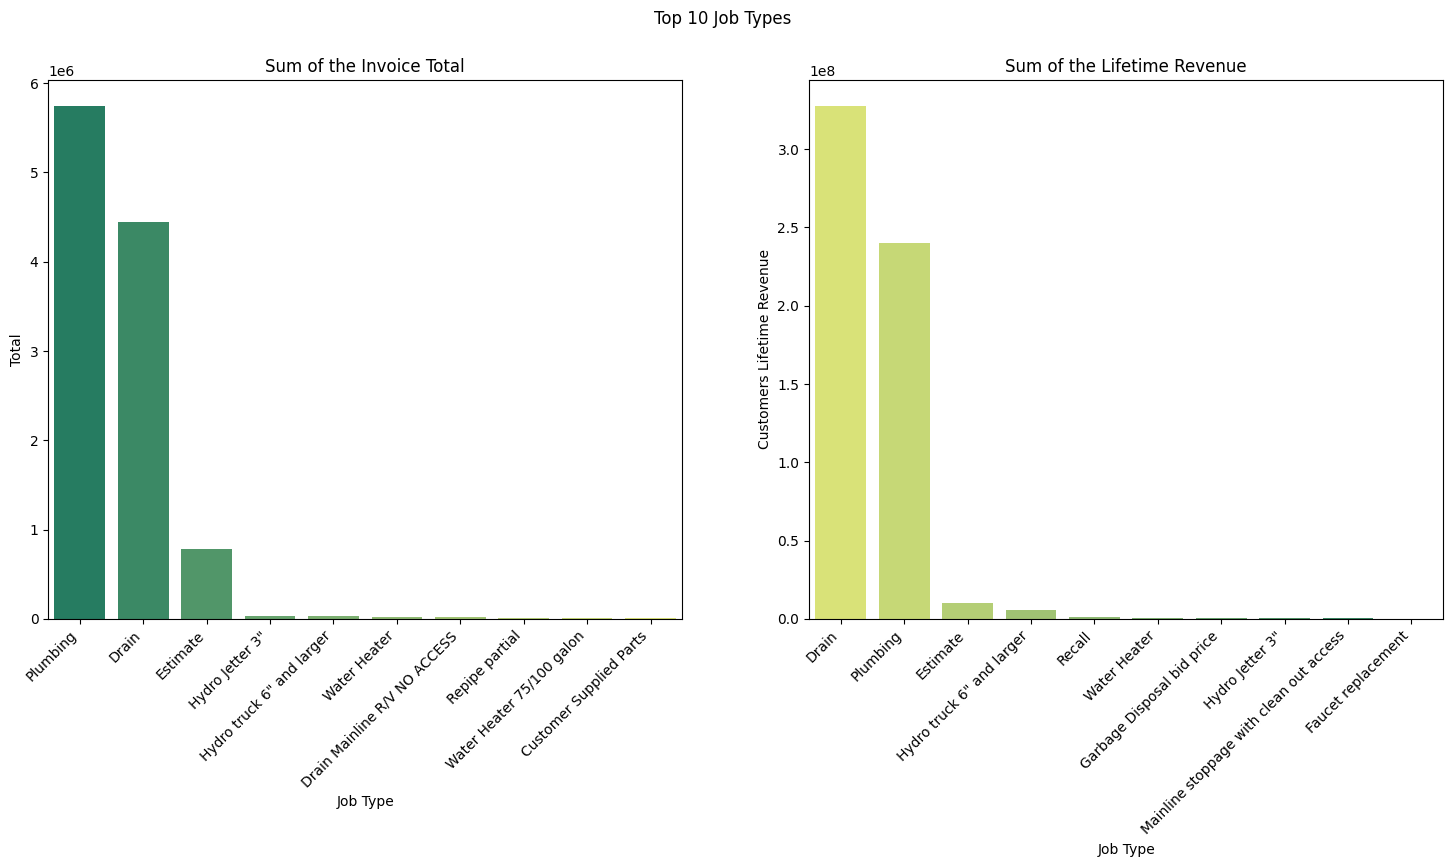

In [25]:
fig, axes = plt.subplots(1,2, figsize=(18,7))

sns.barplot(data=job_type_total[:10], x='Job Type', y='Total', palette='summer', ax=axes[0])
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_xticklabels(axes[0].get_xticklabels(), ha='right')
axes[0].set_title('Sum of the Invoice Total')

sns.barplot(data=job_type_rev[:10], x='Job Type', y='Customers Lifetime Revenue', palette='summer_r', ax=axes[1])
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_xticklabels(axes[1].get_xticklabels(), ha='right')
axes[1].set_title('Sum of the Lifetime Revenue')

plt.suptitle("Top 10 Job Types")

plt.show()

The data indicates that plumbing and drain generates the highest profit for the company. An interesting observation is that 'Estimate' ranks third in terms of profitability. It would be beneficial for the company to explore ways to convert these estimates into actual service requests, potentially increasing revenue and operational effectiveness.

## Residential Customer

In [30]:
def prepare_data_plot(data, year):

    def filter_year(df, year):
        yr_data = df[df['Inv Year']==year]
        return yr_data

    def group_data(df):
        return df.groupby('Invoice_Yr_Mo').agg({'Total':'sum','Invoice #':'count'}).reset_index()

    def final_data(filtered_data):
        filtered_data['Invoice_Yr_Mo'] = pd.to_datetime(filtered_data['Invoice_Yr_Mo'], format='%Y-%b')
        filtered_data = filtered_data.sort_values(by='Invoice_Yr_Mo').reset_index(drop=True)
        filtered_data['Accumulated Total'] = filtered_data['Total'].cumsum()
        filtered_data['Accumulated Invoice'] = filtered_data['Invoice #'].cumsum()
        filtered_data['Invoice_Yr_Mo'] = filtered_data['Invoice_Yr_Mo'].dt.strftime('%Y-%m')
        return filtered_data
    
    yr_data = filter_year(df=data, year=year)
    agg_data = group_data(yr_data)
    return final_data(agg_data)

In [31]:
def create_barplot(data, x, y, customer_type, year, **kwargs):
    plt.figure(figsize=(15,6))
    ax = sns.barplot(data=data, x=x, y=y, **kwargs)
    plt.title(f'Total {customer_type} Customer Revenue in {year}')
    plt.axhline(data['Total'].median(), color='red', linestyle='--')
    plt.xlabel('Year and Month')

    for bar, inv_count in zip(ax.patches, data['Invoice #']):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{inv_count}', ha='center', va='bottom')

    plt.show()

In [32]:
def create_accum_plot(data, year):
    fig, axes = plt.subplots(1,2, figsize=(18,7))

    sns.lineplot(data=data, x='Invoice_Yr_Mo', y='Accumulated Total', marker='o', markerfacecolor='red', ax=axes[0])
    axes[0].set_title('Invoice Total Trend')
    axes[0].set_xlabel('Year-Month')

    sns.lineplot(data=data, x='Invoice_Yr_Mo', y='Accumulated Invoice', marker='o', markerfacecolor='red', ax=axes[1])
    axes[1].set_title('Number of Invoice Trend')
    axes[1].set_xlabel('Year-Month')

    for ax in axes:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    plt.suptitle(f'Accumulated Graphs of Total and Number of Invoices in {year}')
    plt.show()

In [33]:
residential_20 = prepare_data_plot(residential, 2020)
residential_21 = prepare_data_plot(residential, 2021)
residential_22 = prepare_data_plot(residential, 2022)
residential_23 = prepare_data_plot(residential, 2023)

In [34]:
residential_20

,Invoice_Yr_Mo,Total,Invoice #,Accumulated Total,Accumulated Invoice
0,2020-05,165587.84,504,165587.84,504
1,2020-06,196381.99,584,361969.83,1088
2,2020-07,191861.68,585,553831.51,1673
3,2020-08,245627.17,548,799458.68,2221
4,2020-09,182881.60,624,982340.28,2845
5,2020-10,182373.61,633,1164713.89,3478
6,2020-11,175726.57,655,1340440.46,4133
7,2020-12,165343.32,552,1505783.78,4685


### 2020

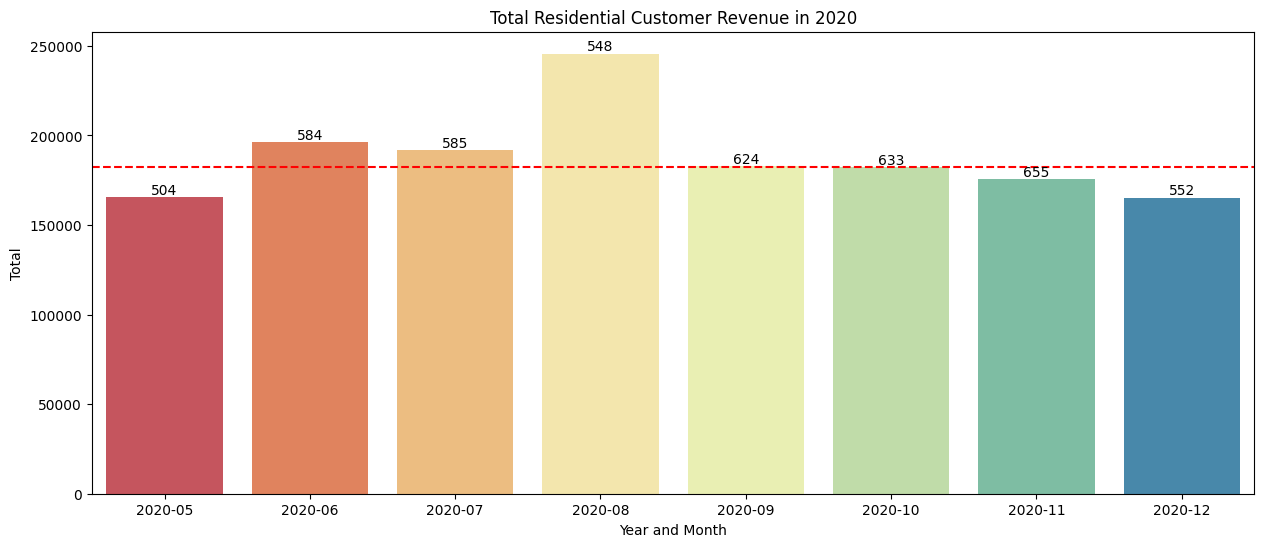

In [35]:
create_barplot(residential_20, 'Invoice_Yr_Mo', 'Total', 'Residential', '2020', palette='Spectral')

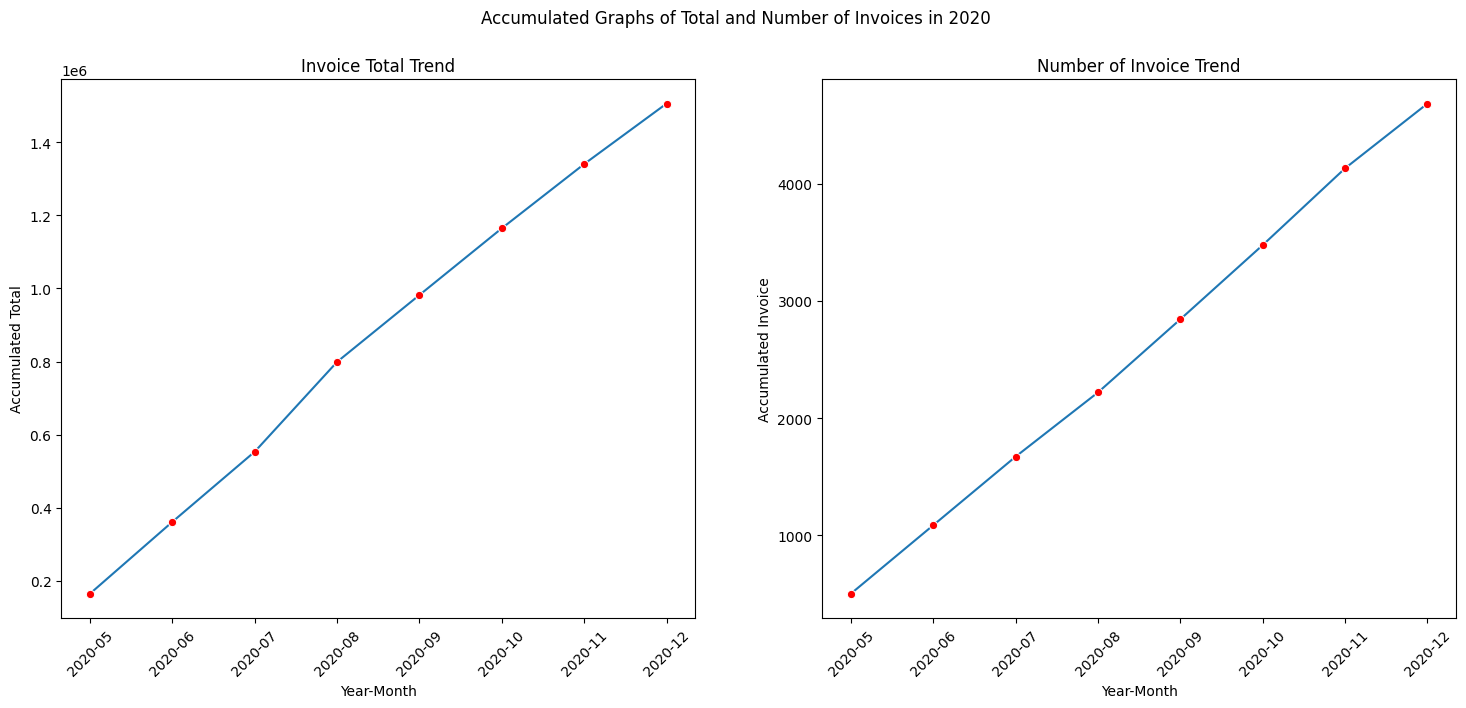

In [36]:
create_accum_plot(residential_20, '2020')

### 2021

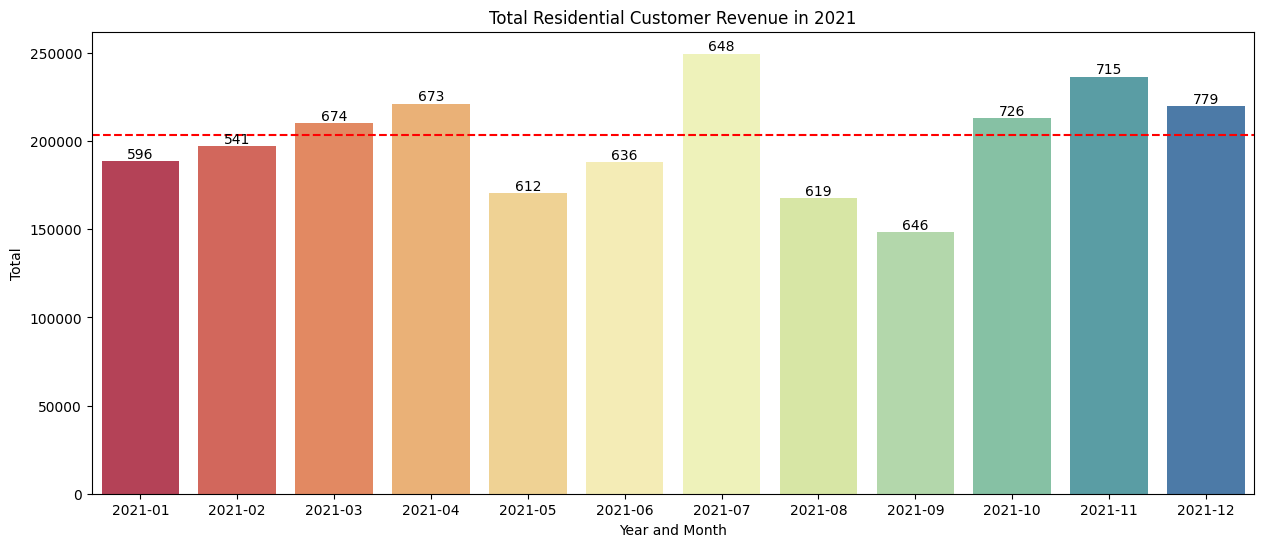

In [37]:
create_barplot(residential_21, 'Invoice_Yr_Mo', 'Total', 'Residential', '2021', palette='Spectral')

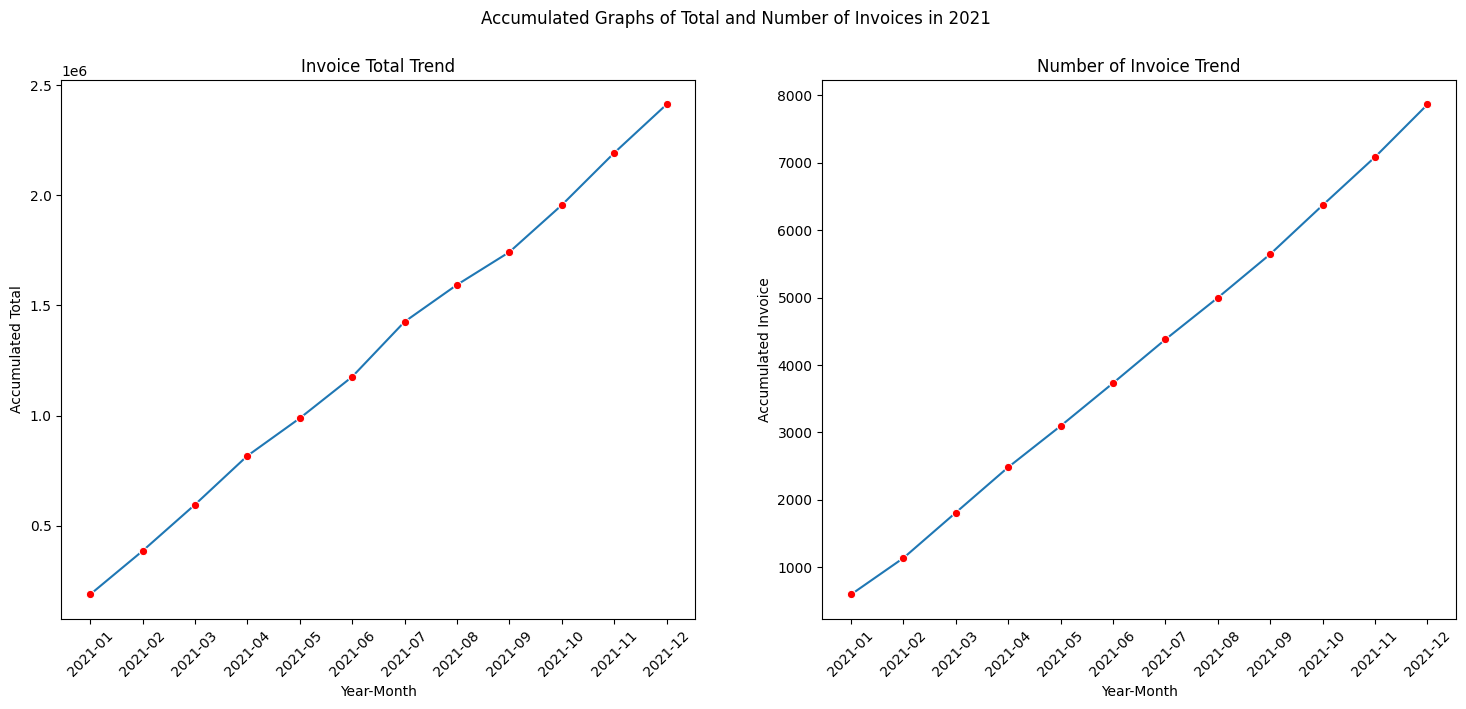

In [38]:
create_accum_plot(residential_21, '2021')

### 2022

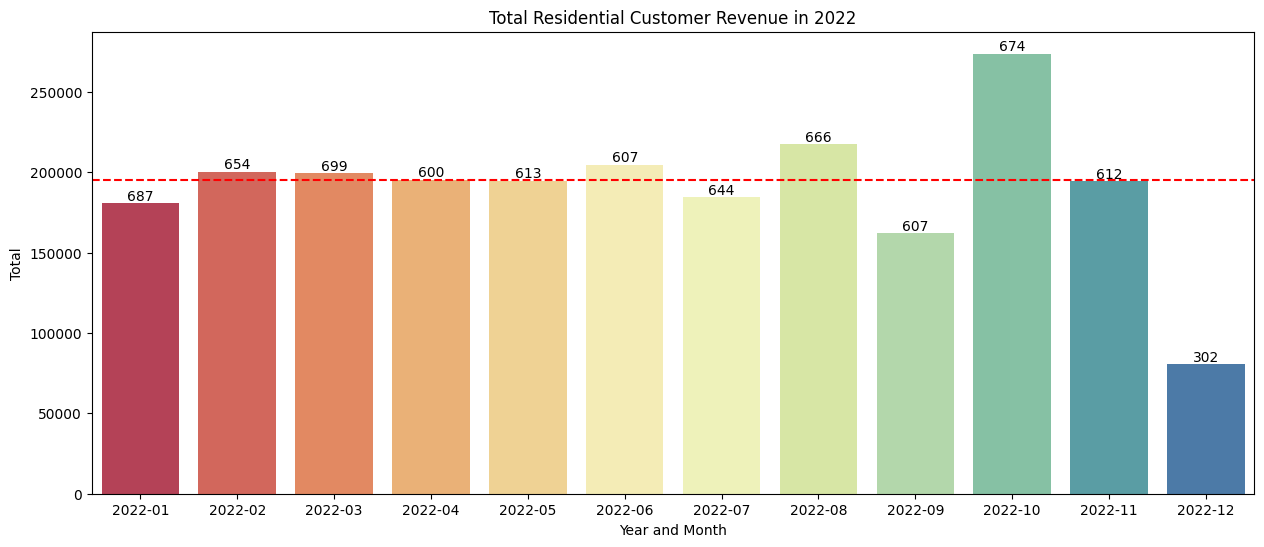

In [39]:
create_barplot(residential_22, 'Invoice_Yr_Mo', 'Total', 'Residential', '2022', palette='Spectral')

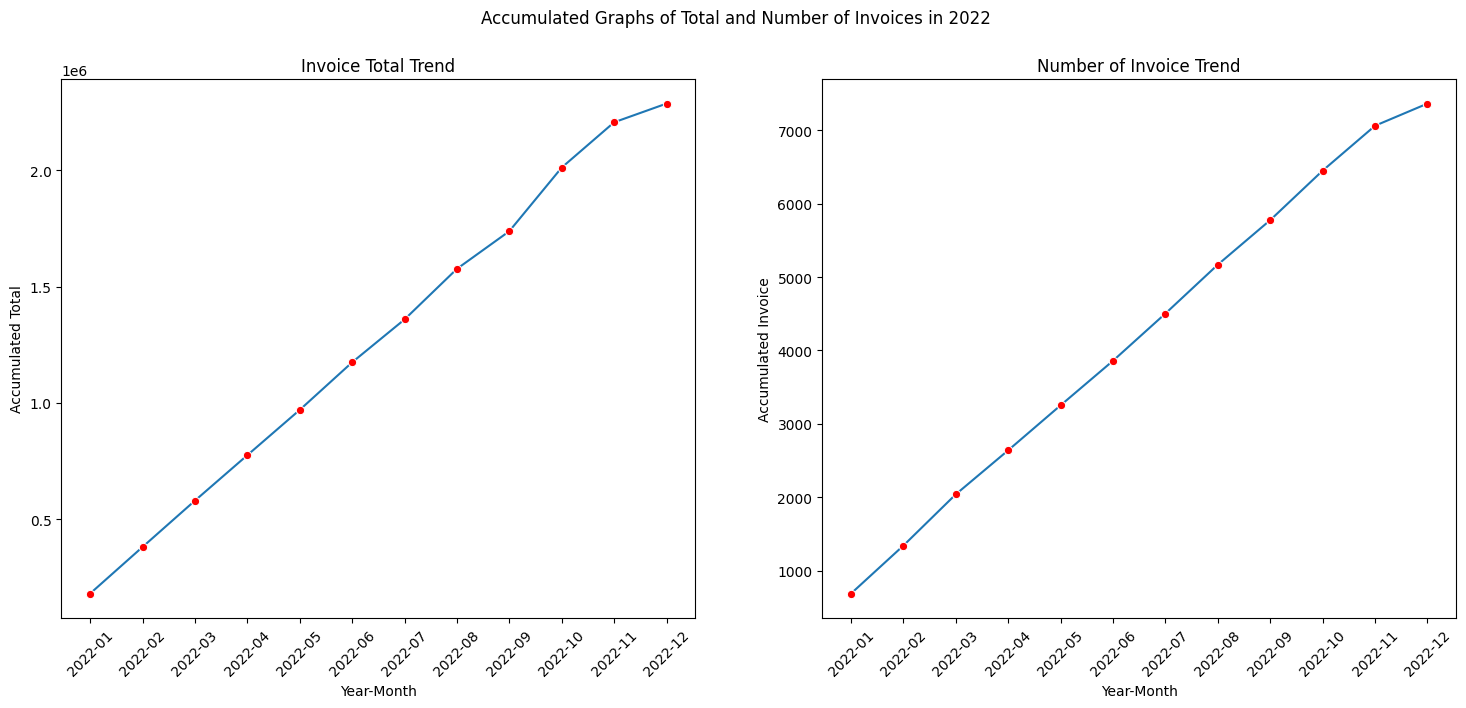

In [40]:
create_accum_plot(residential_22, '2022')

### 2023

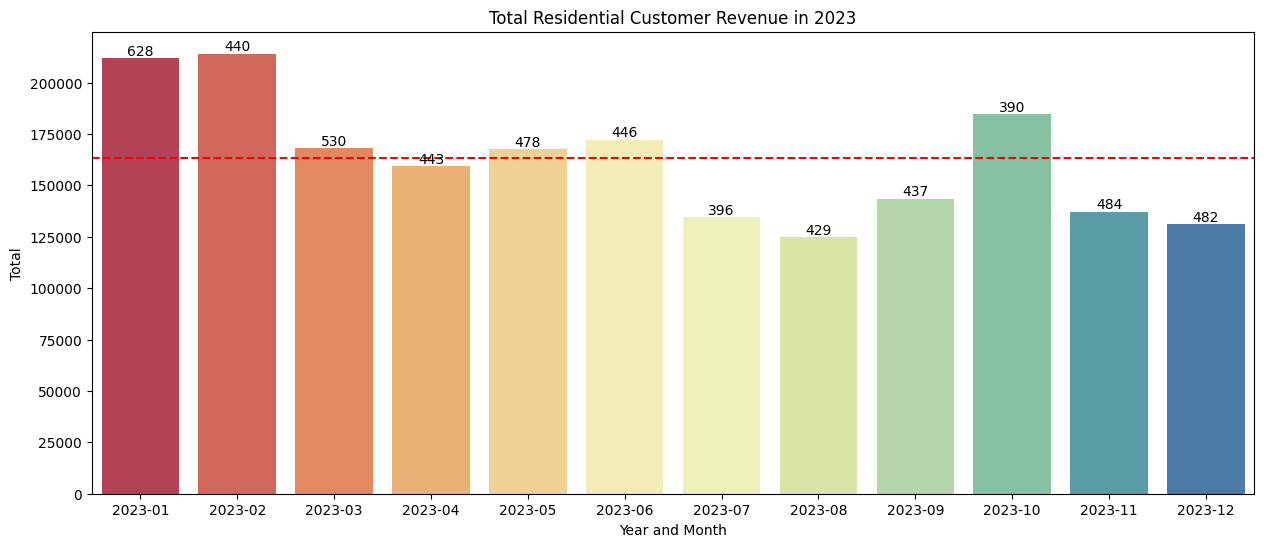

In [41]:
create_barplot(residential_23, 'Invoice_Yr_Mo', 'Total', 'Residential', '2023', palette='Spectral')

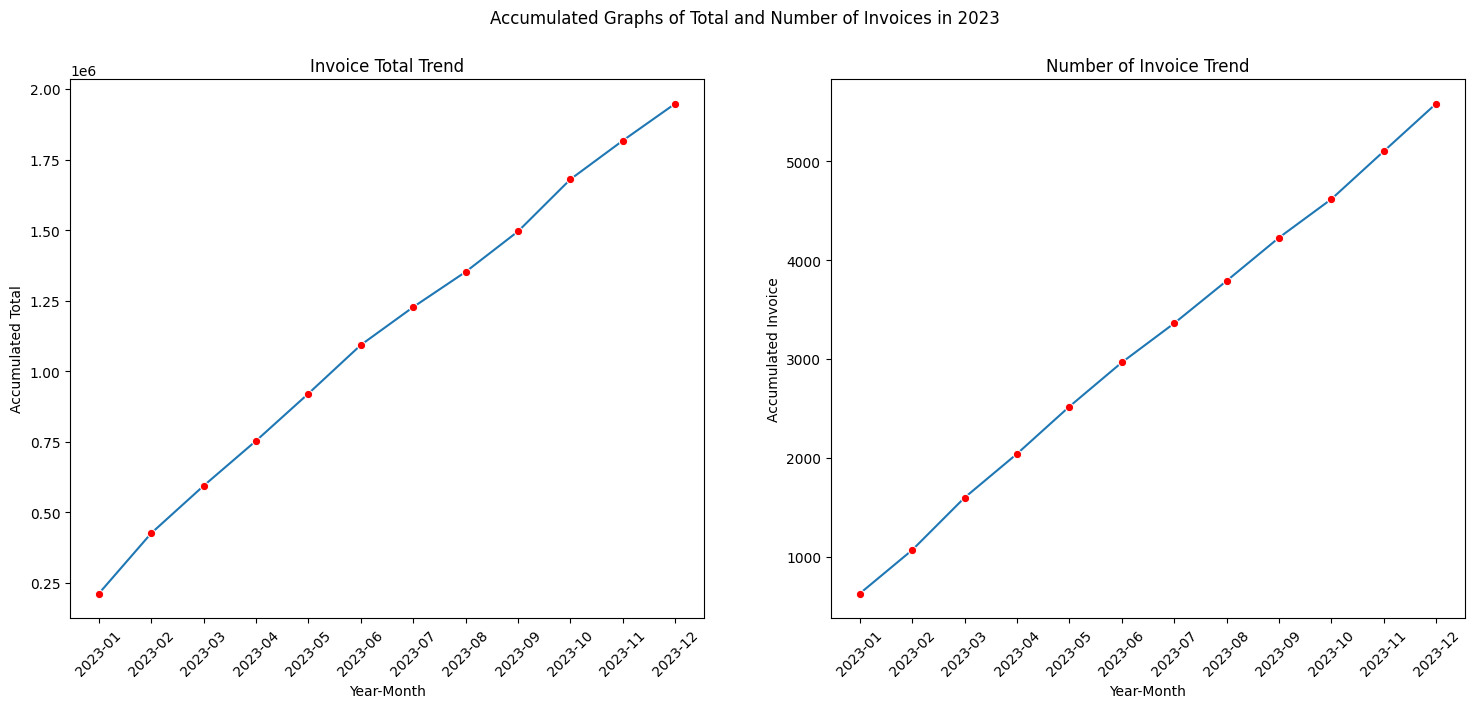

In [42]:
create_accum_plot(residential_23, '2023')

The bar graphs above demonstrate consistent invoice totals from May 2020 to December 2023. However, there's a noticeable spike in January 2023, attributed to a data entry issue.

### Quarter & Weekday

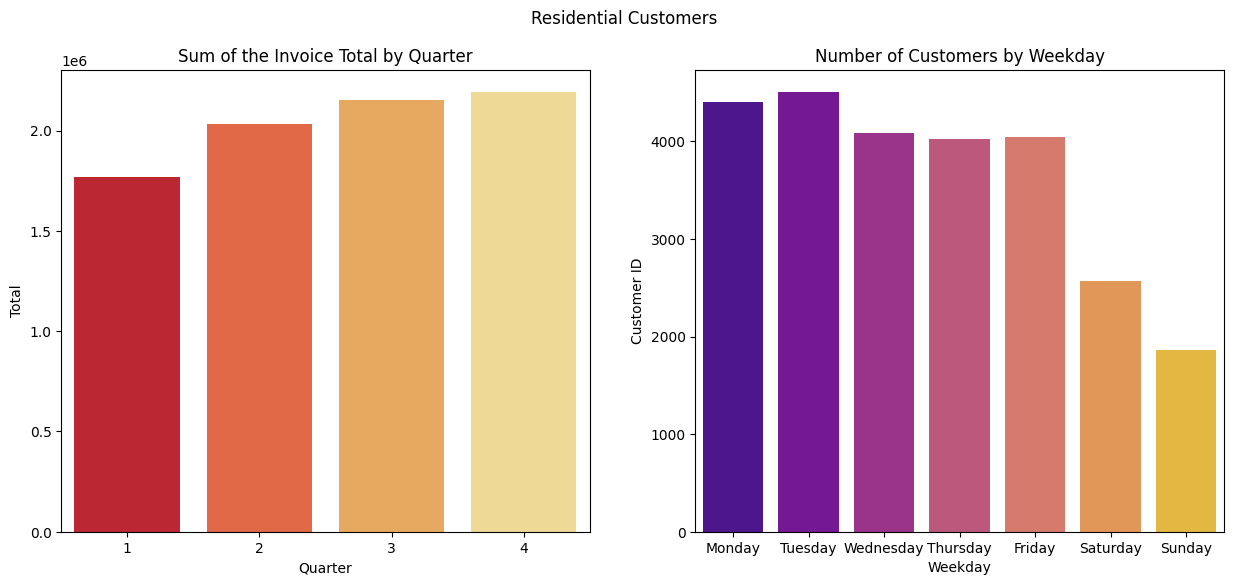

In [156]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

residential_quarter = residential.groupby('Quarter')['Total'].sum().reset_index()
sns.barplot(data=residential_quarter, x='Quarter', y='Total', ax=axes[0], palette='YlOrRd_r')
axes[0].set_title('Sum of the Invoice Total by Quarter')


residential_wday = residential.groupby('Weekday')['Customer ID'].count().reset_index()
sns.barplot(data=residential_wday, x='Weekday', y='Customer ID', ax=axes[1], palette='plasma',
            order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
axes[1].set_title('Number of Customers by Weekday')

plt.suptitle('Residential Customers')

plt.show()

The total amount billed increases consistently each quarter. Most of the work is scheduled during the weekdays, particularly on Mondays and Tuesdays.

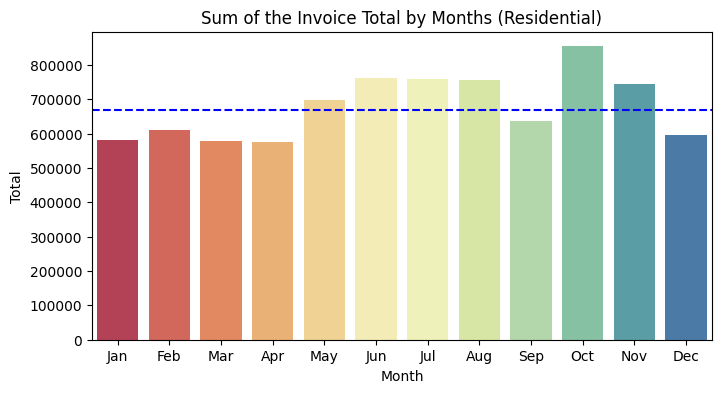

In [136]:
plt.figure(figsize=(8,4))
residential_mo = residential.groupby('Inv Month Name')['Total'].sum().reset_index()
sns.barplot(data=residential_mo, x='Inv Month Name', y='Total', palette='Spectral',
            order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.axhline(residential_mo['Total'].median(), linestyle='--', color='blue')
plt.xlabel('Month')
plt.title('Sum of the Invoice Total by Months (Residential)')

plt.show()

The total invoice amount starts increasing after May. This could be attributed to the dataset beginning from May 2020. If we had data for the entire year of 2020, we could better assess whether the total invoice amount remains consistent throughout the year.

### Location Services

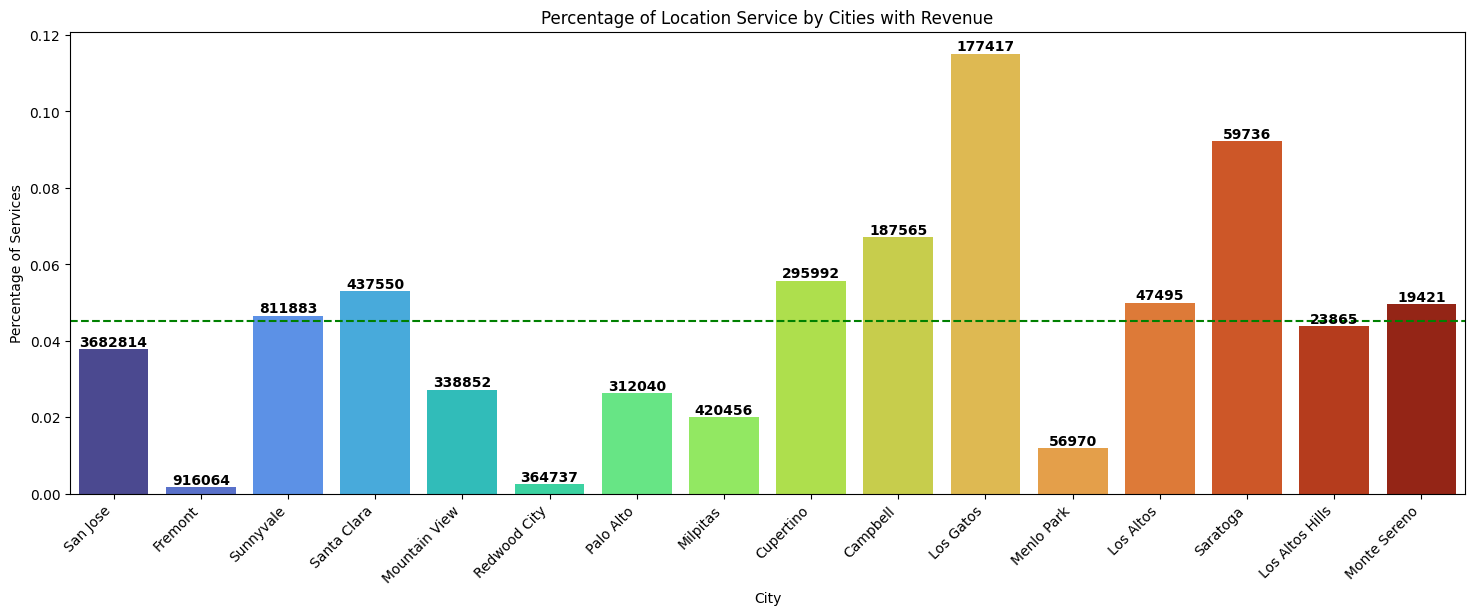

In [157]:
plt.figure(figsize=(18,6))
ax = sns.barplot(data=city.sort_values(by='Num_Households', ascending=False),
                 x='Location City', y='Normalized Services', palette='turbo')
plt.xticks(rotation=45, ha='right')
plt.axhline(city['Normalized Services'].median(), color='g', linestyle='--')

for bar, total in zip(ax.patches, city['Total']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{round(total)}', ha='center', va='bottom', fontweight='bold')

plt.title('Percentage of Location Service by Cities with Revenue')
plt.xlabel('City')
plt.ylabel('Percentage of Services')
plt.show()

The graph above displays the normalized number of invoices and households by city, offering insights into the company's business distribution across different areas. On average, services are utilized by approximately 0.045% of households. Despite this, cities like Los Gatos and Saratoga, while not ranking at the top, show a significant customer base. Conversely, San Jose holds the top spot, followed by Fremont, where the customer base is comparatively lower but profits are higher. A similar trend is observed in Redwood City. The reason behind this trend is evident from the graph above, showing that Fremont has a higher proportion of commercial customers compared to residential ones.

It would be advisable for the business to focus on marketing efforts in Fremont and Redwood City, as these areas present opportunities for increased profitability despite their lower customer bases. Additionally, there is still significant potential for growth in San Jose.

## Commercial Customer

In [44]:
commercial_20 = prepare_data_plot(commercial, 2020)
commercial_21 = prepare_data_plot(commercial, 2021)
commercial_22 = prepare_data_plot(commercial, 2022)
commercial_23 = prepare_data_plot(commercial, 2023)

### 2020

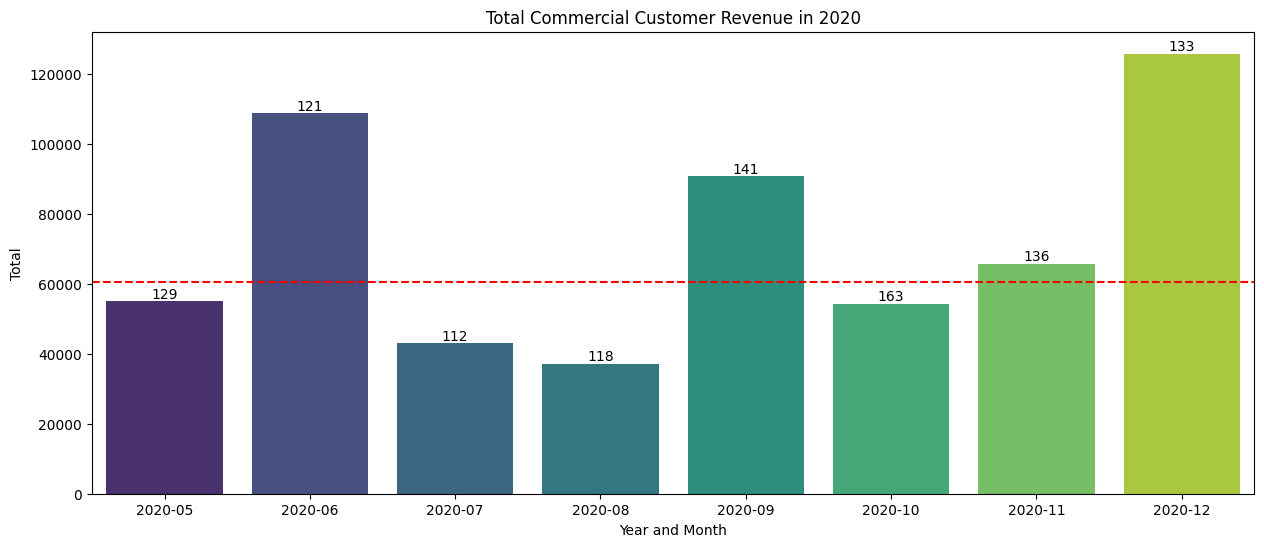

In [45]:
create_barplot(commercial_20, 'Invoice_Yr_Mo', 'Total', 'Commercial', '2020', palette='viridis')

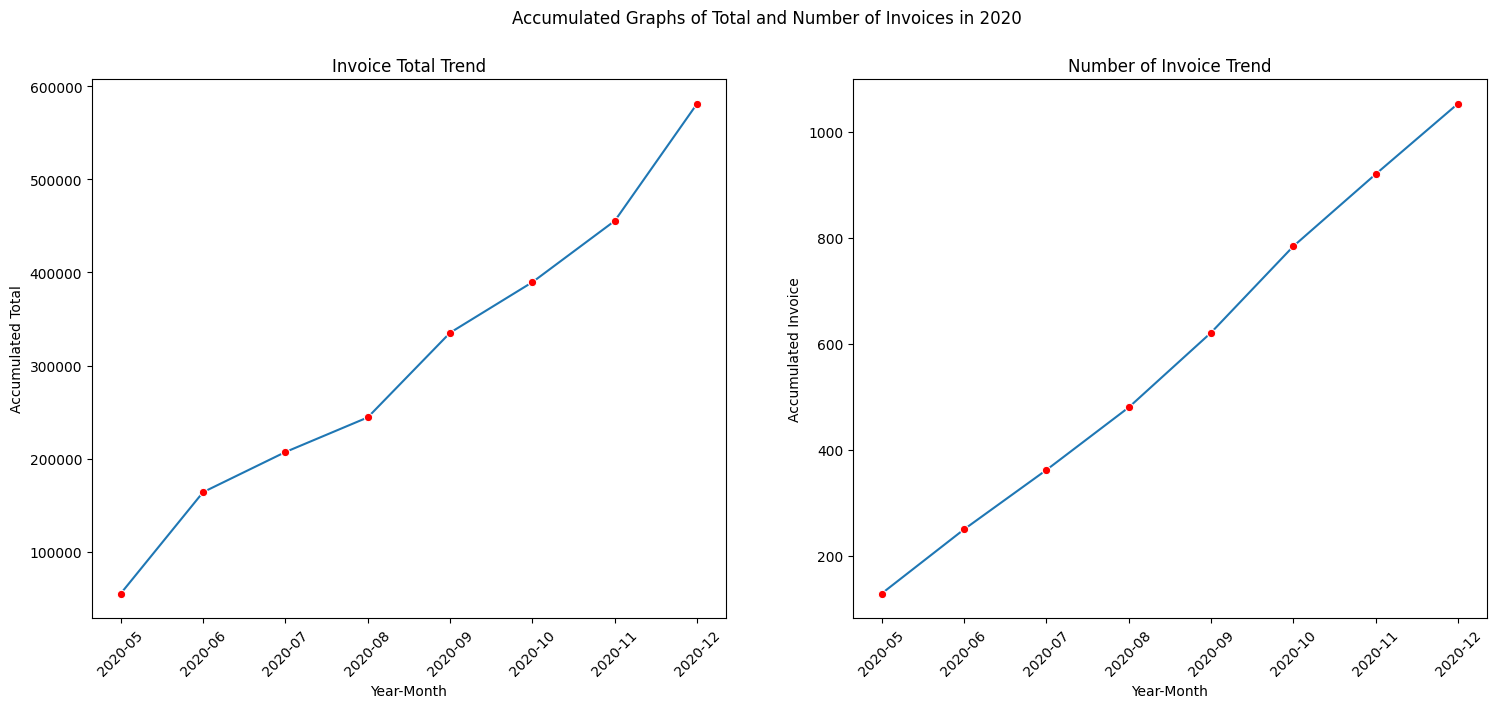

In [46]:
create_accum_plot(commercial_20, '2020')

### 2021

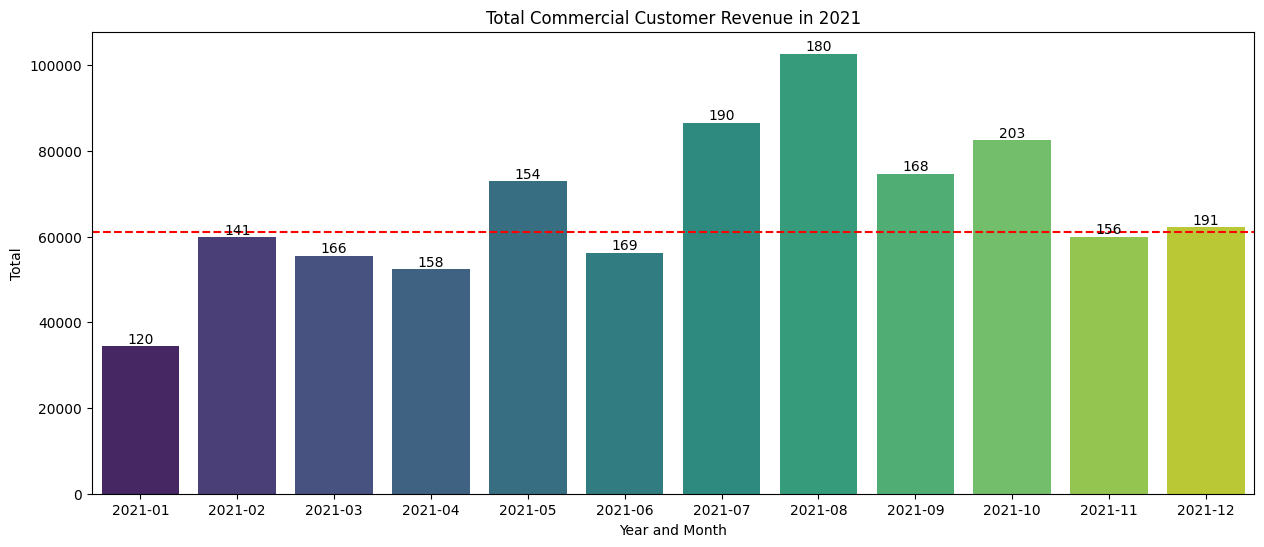

In [48]:
create_barplot(commercial_21, 'Invoice_Yr_Mo', 'Total', 'Commercial', '2021', palette='viridis')

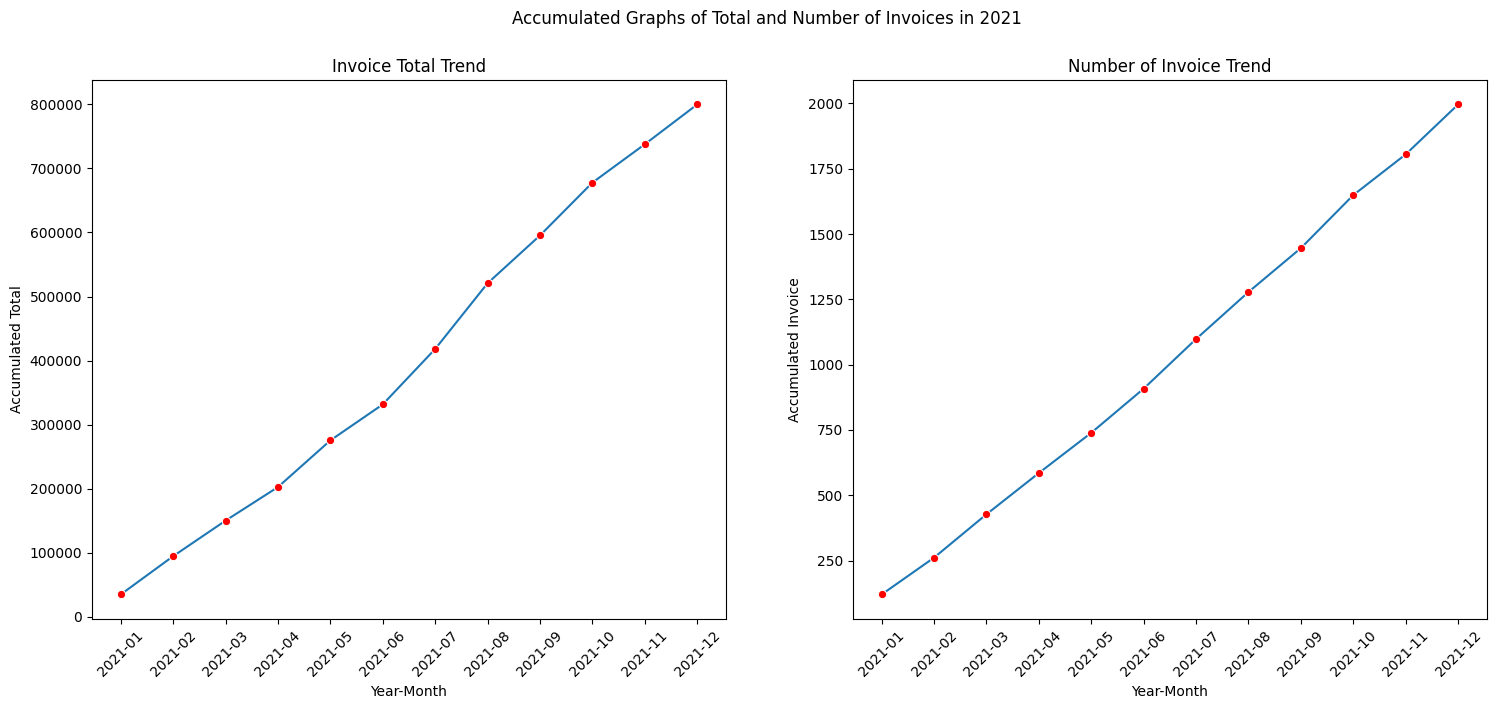

In [49]:
create_accum_plot(commercial_21, '2021')

### 2022

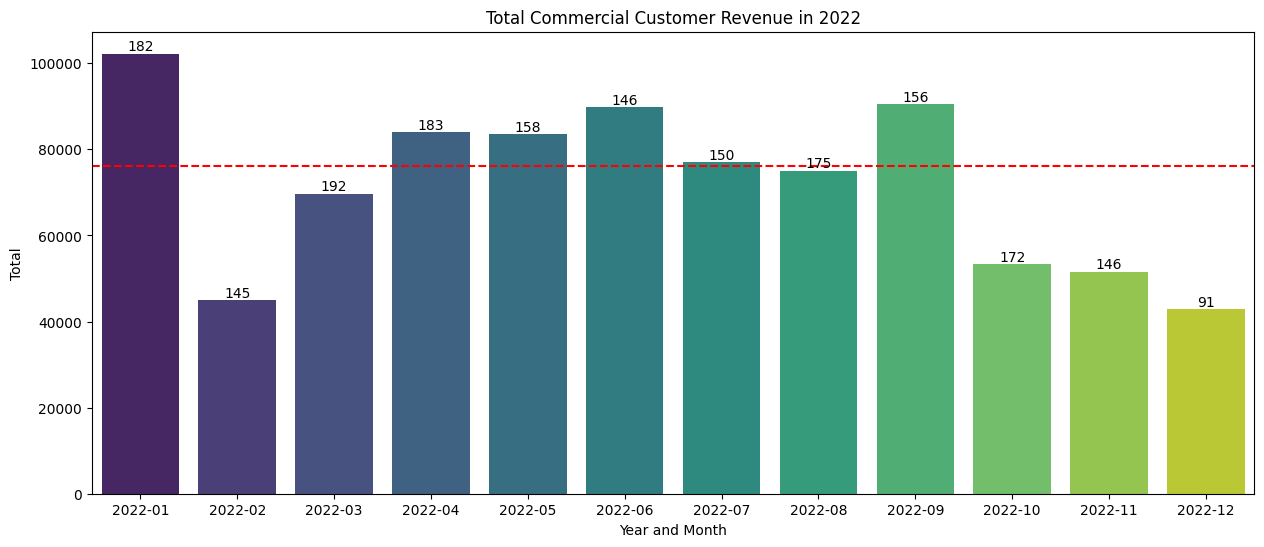

In [50]:
create_barplot(commercial_22, 'Invoice_Yr_Mo', 'Total', 'Commercial', '2022', palette='viridis')

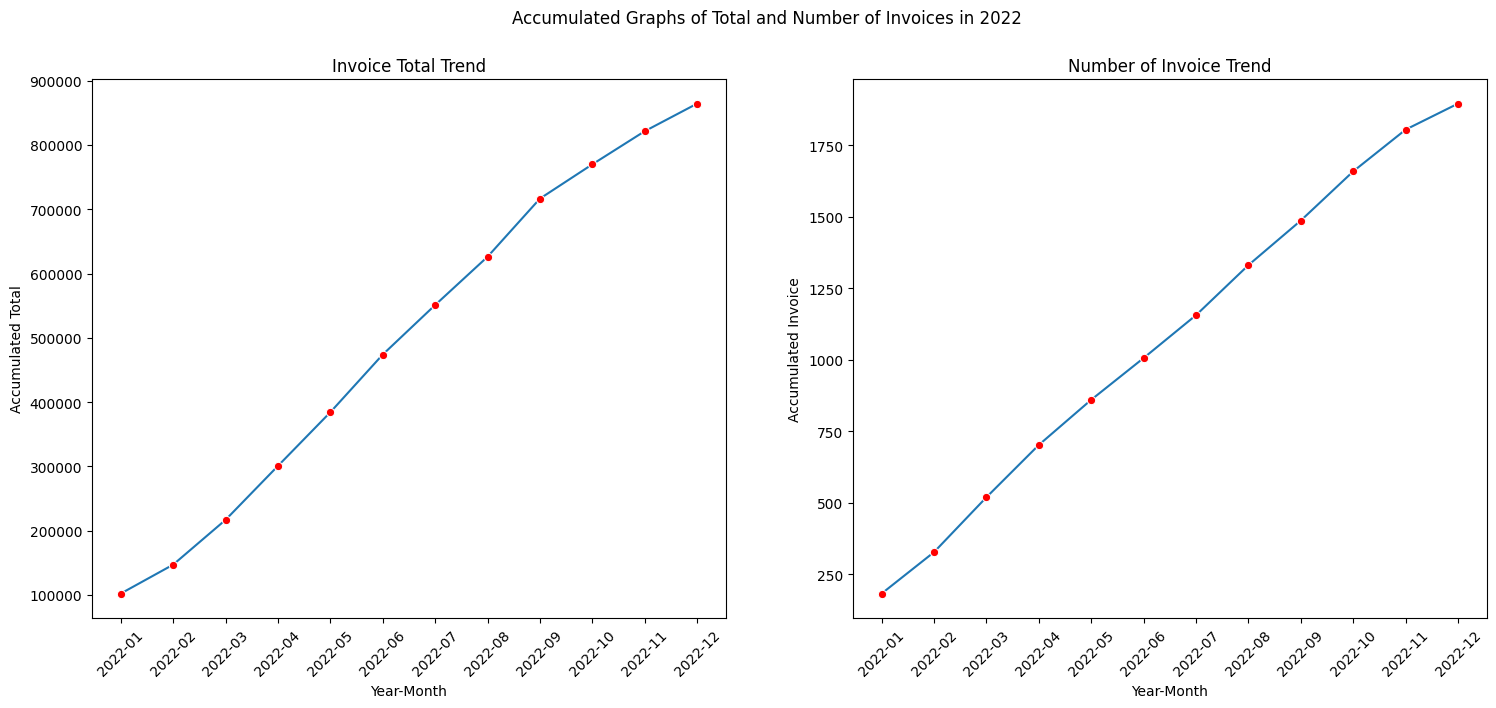

In [51]:
create_accum_plot(commercial_22, '2022')

### 2023

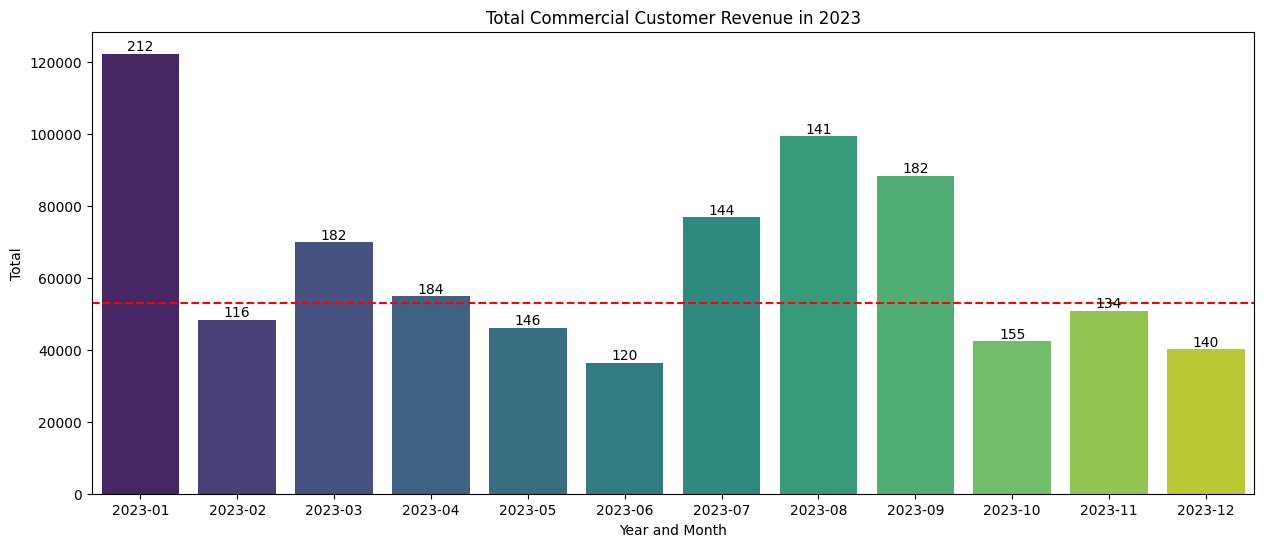

In [52]:
create_barplot(commercial_23, 'Invoice_Yr_Mo', 'Total', 'Commercial', '2023', palette='viridis')

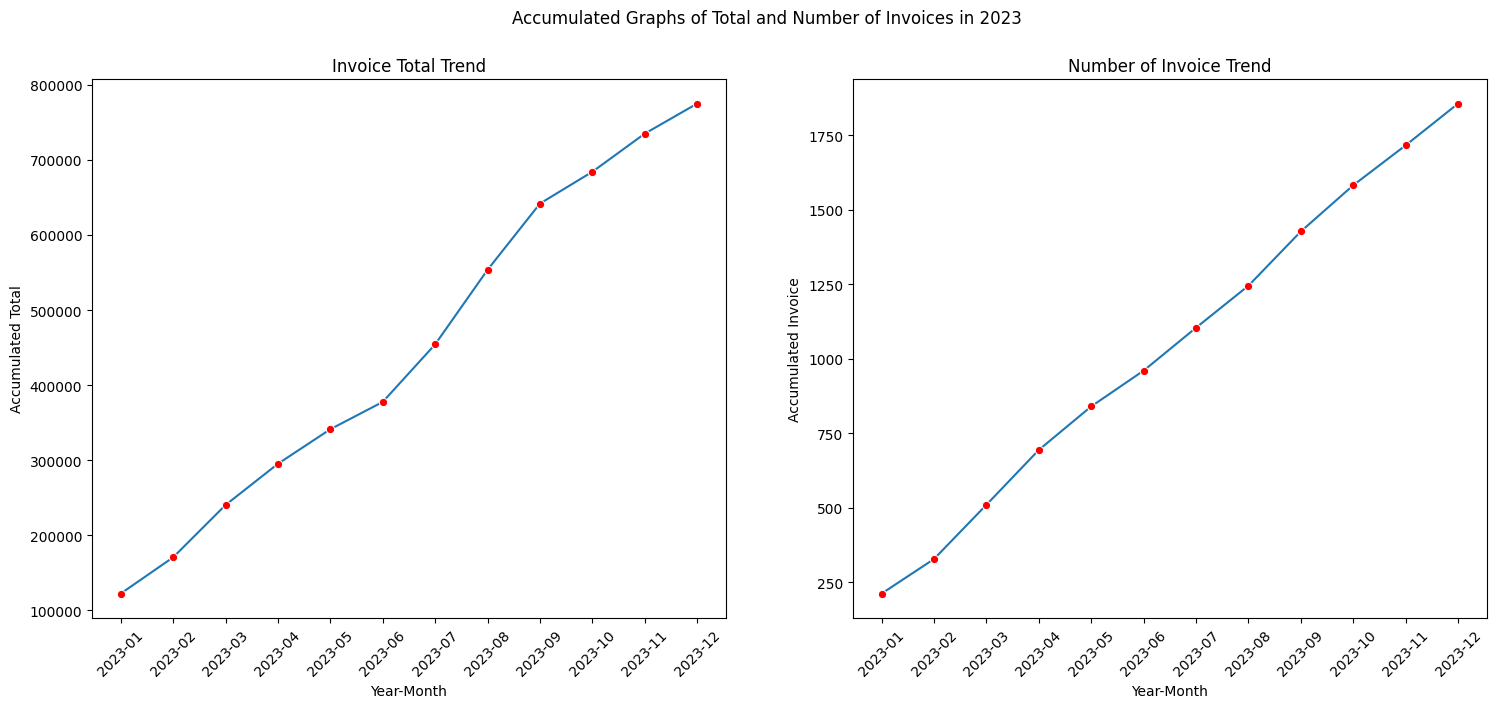

In [53]:
create_accum_plot(commercial_23, '2023')

### Quarter & Weekday

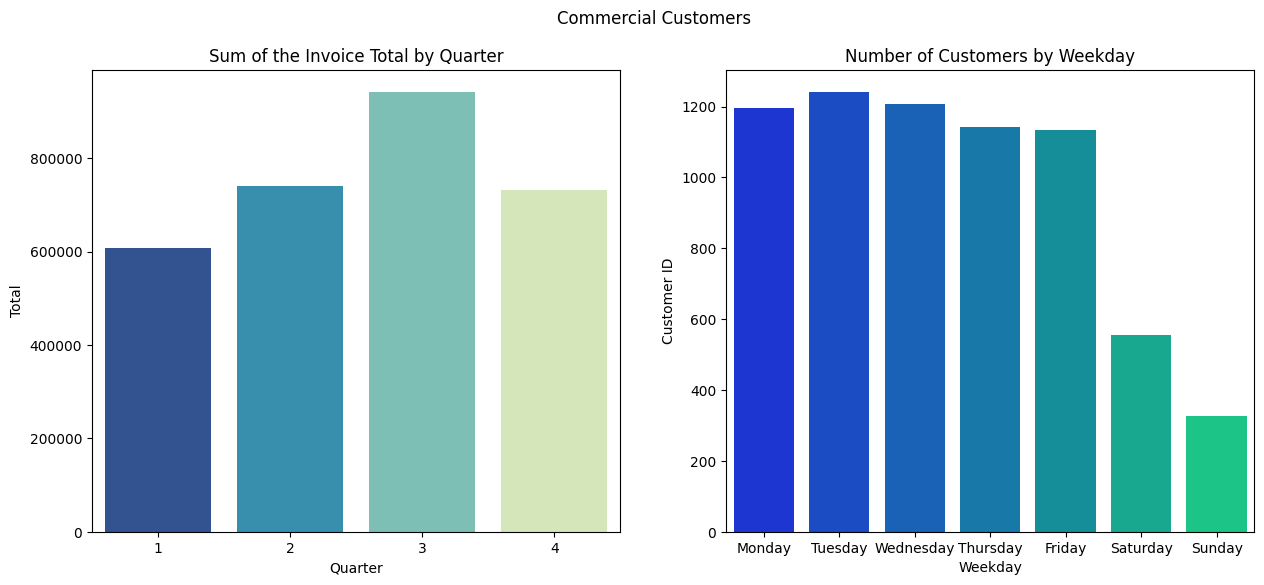

In [160]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

commercial_quarter = commercial.groupby('Quarter')['Total'].sum().reset_index()
sns.barplot(data=commercial_quarter, x='Quarter', y='Total', ax=axes[0], palette='YlGnBu_r')
axes[0].set_title('Sum of the Invoice Total by Quarter')


commercial_wday = commercial.groupby('Weekday')['Customer ID'].count().reset_index()
sns.barplot(data=commercial_wday, x='Weekday', y='Customer ID', ax=axes[1], palette='winter',
            order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
axes[1].set_title('Number of Customers by Weekday')

plt.suptitle('Commercial Customers')

plt.show()

Unlike the residential customers, commercial customers tend to have higher invoice totals in the third quarter. Moreover, most business transactions occur on weekdays.

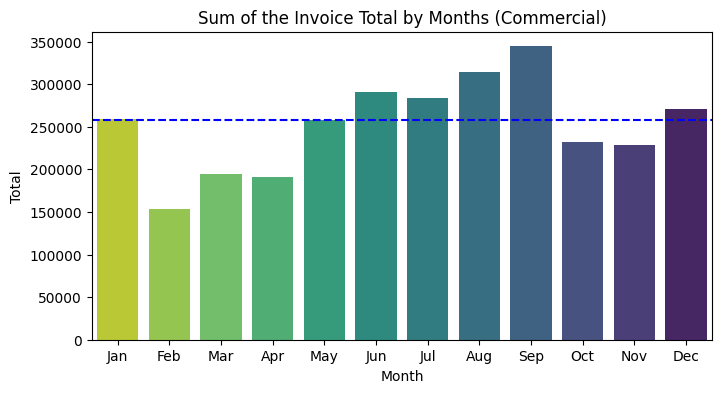

In [138]:
plt.figure(figsize=(8,4))
commercial_mo = commercial.groupby('Inv Month Name')['Total'].sum().reset_index()
sns.barplot(data=commercial_mo, x='Inv Month Name', y='Total', palette='viridis_r',
            order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.axhline(commercial_mo['Total'].median(), linestyle='--', color='blue')
plt.xlabel('Month')
plt.title('Sum of the Invoice Total by Months (Commercial)')

plt.show()

# Summary

- There are more residential customers than commercial ones, but the average and median invoice totals per customer are higher for commercial clients. It's advisable for the business to attract more commercial customers.
- To target commercial clients, the business could consider advertising more in areas like Fremont. Additionally, there's room for growth in San Jose. Implementing marketing strategies such as offering discounts or referral programs could help expand the customer base.